# **Arrests in Pittsburgh**

**Introduction:** Our project is about finding the least safe neighborhood based on three sub metrics. Our apporach is that the "best" neighborhood is the one with the most overall unsafe statistics. We chose this metric because its an interesting and unique way to look at data. An alternative metric we were thinking about before landing on this idea was landscapes features in each neighborhood in Pittsburgh.


**Submetric:** My submetric is arrests in Pittsburgh, using data set from Pittsburgh Police, **URL:** https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f


**Data:** I will be using neighborhoods and number of arrests in each neighborhood to determine "best" neighborhood.

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv", parse_dates=True)

data.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,7,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,8,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,9,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,10,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


This data contains a lot of information about arrests in Pittsburgh but we are focused on one column in particular: **"INCIDENTNEIGHBORHOOD"** as our goal is to find the most dangerous neighborhood, we simply need to count the number of incidents per neighborhood. With the help of the values counts function we can focus on just that!

In [29]:
neighborhood_counts = pd.DataFrame(data['INCIDENTNEIGHBORHOOD'].value_counts())
neighborhood_counts.head(10)

,INCIDENTNEIGHBORHOOD
Central Business District,4440
South Side Flats,3497
Carrick,2351
East Allegheny,2217
Homewood South,2090
Homewood North,1969
East Liberty,1889
Marshall-Shadeland,1516
Bluff,1502
Mount Washington,1434


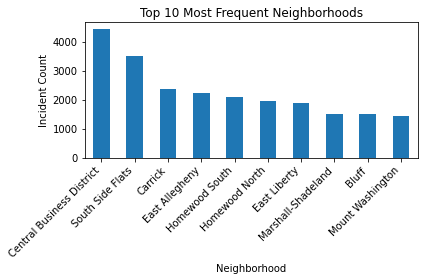

In [30]:
# Define the columns to read
columns_to_read = ['INCIDENTNEIGHBORHOOD']

# Read the data from the CSV file
data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv", parse_dates=True, usecols=columns_to_read)

# Count the occurrences of each neighborhood
neighborhood_counts = data['INCIDENTNEIGHBORHOOD'].value_counts()

# Sort the neighborhood counts in descending order
neighborhood_counts_sorted = neighborhood_counts.sort_values(ascending=False)

# Select the top 10 most frequent neighborhoods
top_10_neighborhoods = neighborhood_counts_sorted.head(10)

# Plot the counts of the top 10 most frequent neighborhoods
top_10_neighborhoods.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Incident Count')
plt.title('Top 10 Most Frequent Neighborhoods')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv", parse_dates=True)
# What are the most popular incidents?
offense_counts = pd.DataFrame(data['OFFENSES'].value_counts().sort_values(ascending=False))
offense_counts.head(15)

,OFFENSES
2701 Simple Assault.,4526
9015 Failure To Appear/Arrest on Attachment Order,3639
9501 Bench Warrant,3524
13(a)(32) Paraphernalia - Use or Possession,1219
"2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury",1104
13(a)(31) Marijuana: Possession Small Amount,1085
13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,1072
2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck,840
9093 Indirect Criminal Contempt,833
3929 Retail Theft.,828


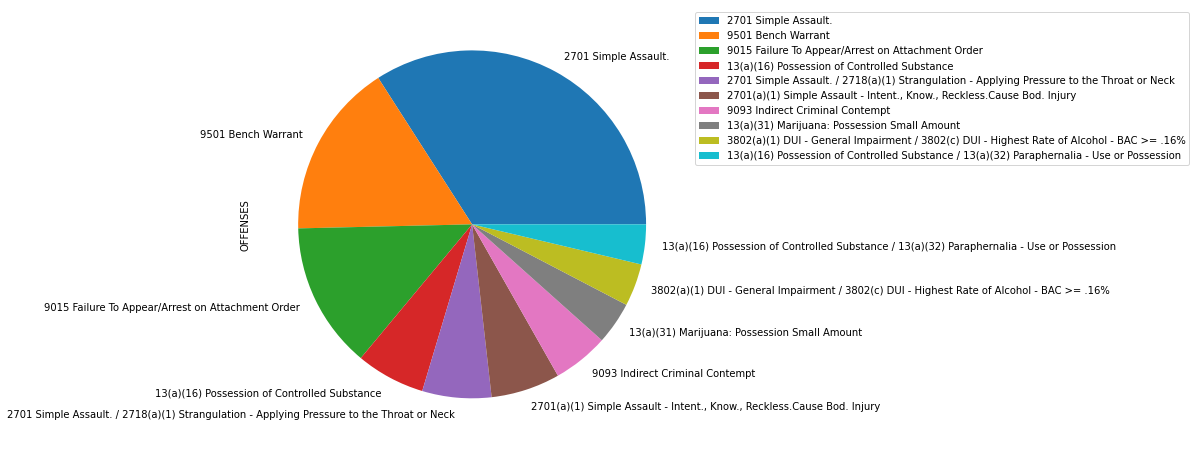

In [73]:
offense_counts.head(10).plot.pie(y='OFFENSES', subplots=False, figsize=(8, 8));
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [67]:
import pandas as pd

# Define the offenses you want to track
offenses = ["2701 Simple Assault.", "9015 Failure To Appear/Arrest on Attachment Order", "9501 Bench Warrant", "13(a)(32) Paraphernalia - Use or Possession",
            "2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury",
            "13(a)(31) Marijuana: Possession Small Amount", "13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession",
            "2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck", "9093 Indirect Criminal Contempt", "3929 Retail Theft."]

# Initialize an empty DataFrame with neighborhoods as index and offenses as columns
offenses_df = pd.DataFrame(index=neighborhood_counts.index.values, columns=offenses)

# Fill the DataFrame with zeros
offenses_df = offenses_df.fillna(0)

# Iterate over the rows of the police data
for row in range(len(data)):
    neighborhood = data.at[row, 'INCIDENTNEIGHBORHOOD']
    offense = data.at[row, 'OFFENSES']
    if neighborhood in offenses_df.index:
        if offense in offenses:
            offenses_df.at[neighborhood, offense] += 1

# Display the first few rows of the DataFrame
offenses_df.head(10)

,2701 Simple Assault.,9015 Failure To Appear/Arrest on Attachment Order,9501 Bench Warrant,13(a)(32) Paraphernalia - Use or Possession,"2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury",13(a)(31) Marijuana: Possession Small Amount,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck,9093 Indirect Criminal Contempt,3929 Retail Theft.
Central Business District,213,319,313,81,55,40,62,20,27,106
South Side Flats,146,170,159,22,42,73,30,24,14,53
Carrick,215,133,144,41,49,49,54,41,42,16
East Allegheny,64,209,153,98,9,27,100,10,11,51
Homewood South,112,146,118,82,22,45,56,24,13,1
Homewood North,132,115,108,42,24,52,31,24,21,4
East Liberty,107,110,79,7,21,29,11,9,27,220
Marshall-Shadeland,131,66,60,23,33,21,28,38,30,14
Bluff,52,135,118,104,12,15,71,5,1,3
Mount Washington,138,55,66,12,26,16,15,26,21,2


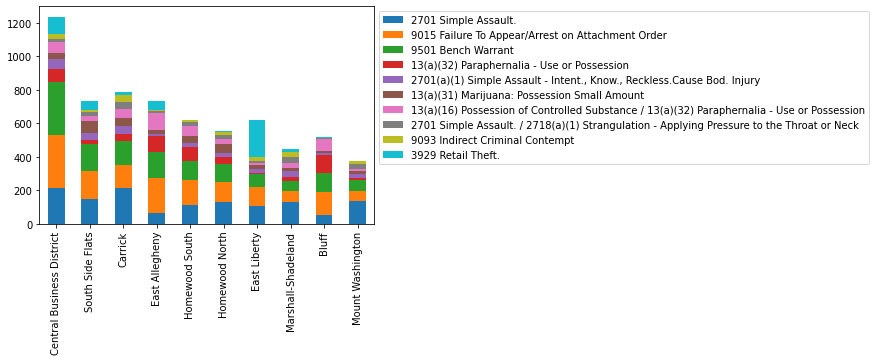

In [72]:
# Stacked bar graph visualization of most UNsafe neighborhoods
offenses_df.head(10).plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

From this data **Central Business District** is the most unsafe neighborhood in Pittsburgh